In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

#Problem 1: Short Update

### I would say we are 80% complete.
1. I am finishing the application/data gereration part of the program
2. We have integrated an IMF for more realistic simulation
3. Considering integrating something similar for velocity with a MBoltz Distro
4. Nate is handling the analysis part of the data in a notebook env.
5. I'm currently questioning my sanity with numpy and multiplying different matrix entries. Will draw it out on a whiteboard to make sure i'm handling x,y,z components clearly.

In [ ]:
print('goodbye world')

goodbye world


In [ ]:
!wget https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week11/hd33632ab_spec_with_errors.txt
!wget https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week11/hip99770b_spec_with_errors.txt
!wget https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week11/week11.md

--2023-11-08 16:59:34--  https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week11/hd33632ab_spec_with_errors.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1232 (1.2K) [text/plain]
Saving to: ‘hd33632ab_spec_with_errors.txt’

hd33632ab_spec_with 100%[===================>]   1.20K  --.-KB/s    in 0s      

2023-11-08 16:59:34 (41.6 MB/s) - ‘hd33632ab_spec_with_errors.txt’ saved [1232/1232]

--2023-11-08 16:59:34--  https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week11/hip99770b_spec_with_errors.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting 

#Problem 2

### Turned everything into functions for better readability.
1. Function to Load data files
2. Function to split columns based on your description of them
3. Function to calculate mean flux of the np array
4. Function to scale to mean
5. Calls Functions to load/normalize
6. Plots to standard.

In [ ]:
#check part 3 near line 6 for matplotlib notes


def load_data(filename):
    return np.loadtxt(filename)

def get_columns(data):
  """
  action:
    splits data into seperate columns based on given .md column descriptions

  returns:
    tuple: Wavelength (microns), FD (mJy), Uncertainity, SNR
  """
  return data[:, 0], data[:, 1], data[:, 2], data[:, 3]

def calc_mean_flux(flux):
  """
  action:
    calculates mean of given flux density np.array

  returns:
    float of mean flux density
  """
  return np.mean(flux)

def scale_flux(target_flux, ref_flux):
  """
  action:
    scales target flux based on the mean flux of the referenced flux

  returns:
  ndarray of scaled target flux
  """
  scaling_factor = calc_mean_flux(ref_flux) / calc_mean_flux(target_flux)
  return target_flux * scaling_factor

#calls function to load
hip_data = load_data('hip99770b_spec_with_errors.txt')
hd_data = load_data('hd33632ab_spec_with_errors.txt')

#slices columns using get columns
hip_wavelength, hip_flux, hip_uncertainty, hip_snr = get_columns(hip_data)
hd_wavelength, hd_flux, hd_uncertainty, hd_snr = get_columns(hd_data)

#uses scale_flux to scale hd flux
hd_flux_scaled = scale_flux(hd_flux, hip_flux)



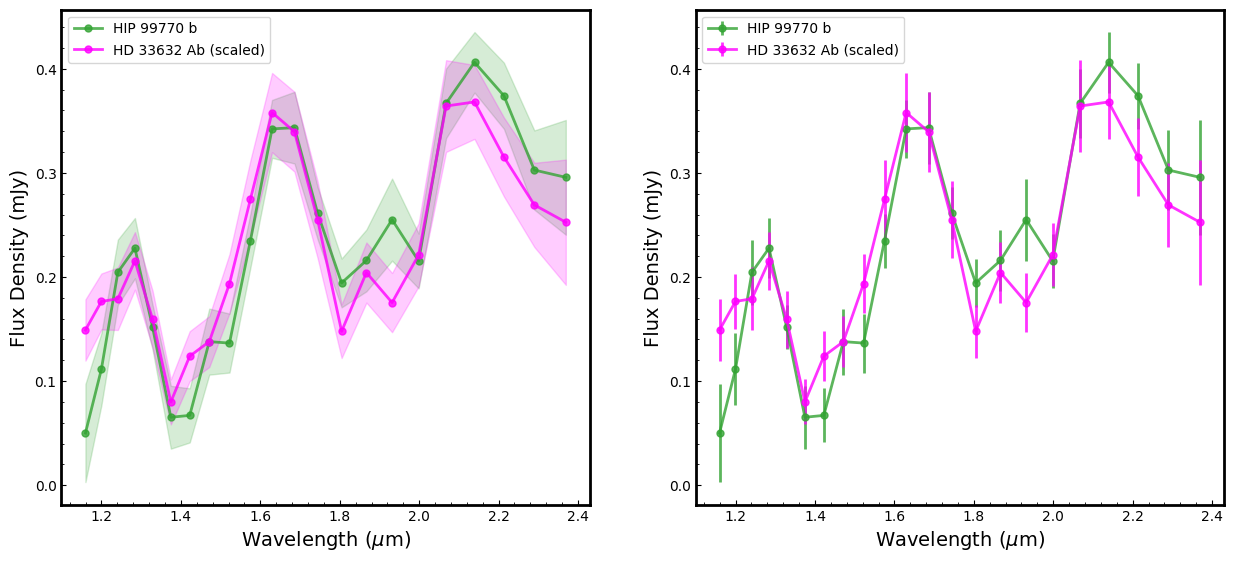

In [ ]:
#tuneable parameters
#again used colorpicker online
HIP_color = '#33a333'
HD_color = '#ff00ff'
marker_type = 'o'
marker_size = 5
line_alpha = 0.8
line_thickness = 2.0
spine_thickness = 2
num_minor_ticks = 5
#looks like 21:9 is the correct ratio but looked too large in collab, keep same ratio
fig_width = 15
fig_height = fig_width * (9/21)

#axes properties
label_font = {'weight': 'normal', 'size': 14}

#fig,axes subplot
fig, axs = plt.subplots(1, 2, figsize=(fig_width,fig_height))

#fill between plt
ax = axs[0]
ax.plot(hip_wavelength, hip_flux, label='HIP 99770 b', color=HIP_color, marker=marker_type, markersize=marker_size, alpha=line_alpha, linewidth=line_thickness)
ax.fill_between(hip_wavelength, hip_flux - hip_uncertainty, hip_flux + hip_uncertainty, color=HIP_color, alpha=0.2)
ax.plot(hd_wavelength, hd_flux_scaled, label='HD 33632 Ab (scaled)', color=HD_color, marker=marker_type, markersize=marker_size, alpha=line_alpha, linewidth=line_thickness)
ax.fill_between(hd_wavelength, hd_flux_scaled - hd_uncertainty, hd_flux_scaled + hd_uncertainty, color=HD_color, alpha=0.2)

#standard error bar plt
ax = axs[1]
ax.errorbar(hip_wavelength, hip_flux, yerr=hip_uncertainty, label='HIP 99770 b', color=HIP_color, marker=marker_type, markersize=marker_size, alpha=line_alpha, linewidth=line_thickness)
ax.errorbar(hd_wavelength, hd_flux_scaled, yerr=hd_uncertainty, label='HD 33632 Ab (scaled)', color=HD_color, marker=marker_type, markersize=marker_size, alpha=line_alpha, linewidth=line_thickness)

#common settings
for ax in axs:
    ax.set_xlabel(r'Wavelength ($\mu$m)', fontdict=label_font)
    ax.set_ylabel('Flux Density (mJy)', fontdict=label_font)
    ax.legend()
    for spine in ax.spines.values():
        spine.set_linewidth(spine_thickness)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(num_minor_ticks))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(num_minor_ticks))
    ax.tick_params(axis='both', direction='in', which='both') #thanks for pointing this out


#save as vectorized photo
plt.savefig('problem2.pdf',format='pdf')
plt.show()
